In [63]:
import seaborn as sc
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
sc.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [5]:
carG=pd.read_csv('국산차.csv',encoding="cp949", index_col='month')
carS=pd.read_csv('수입차.csv',encoding="cp949", index_col='month')
carG_ggl=pd.read_csv('국산차_구글 트렌드.csv',encoding="cp949", index_col='month')
naverG = pd.read_excel('국산차검색량.xlsx', index_col='month')
naverS = pd.read_excel('수입차검색량.xlsx', index_col='month')

In [162]:
typeG={'SUV_대형': ['현대 싼타페', '기아 카니발', '현대 팰리세이드'],
 'SUV_중형': ['기아 쏘렌토', '기아 스포티지', '현대 투싼', 'KG 모빌리티 토레스', '현대 아이오닉 5', '르노코리아 QM6', '제네시스 GV70'],
 'SUV_소형': ['현대 코나', '르노코리아 XM3',  '현대 베뉴', '현대 캐스퍼',  '기아 셀토스',  'KG 모빌리티 티볼리',  '기아 니로',  'KG 모빌리티 렉스턴 스포츠'],
 '상용차': ['현대 포터', '기아 봉고', '현대 스타렉스'],
 '경차': ['기아 모닝', '쉐보레 스파크', '기아 레이'],
 '세단_대형': ['현대 그랜저', '기아 K7', '기아 K8', '제네시스 G80', '제네시스 GV80'],
 '세단_중형': ['현대 아반떼', '기아 K5', '현대 쏘나타', '르노코리아 SM6', '쉐보레 말리부', '현대 아이오닉 6'],
 '세단_소형': ['기아 K3']}
typeS = {
 'SUV_대형': ['혼다 파일럿', '벤츠 GLS', '벤츠 G클래스', 'BMW X7', 'BMW X6', '아우디 Q7', '포르쉐 카이엔', '랜드로버 레인지로버', '테슬라 모델 X', '포드 익스플로러', '지프 그랜드 체로키', '랜드로버 디스커버리'],
 'SUV_중형': ['BMW X3', '벤츠 GLC', '벤츠 GLB', 'BMW X5', 'BMW X4', 'BMW iX3', '아우디 Q5', '렉서스 RX', '볼보 XC60','테슬라 모델 Y', '벤츠 GLE', '폭스바겐 ID.4', '랜드로버 디스커버리 스포츠'],
 'SUV_소형': ['폭스바겐 티구안', '폭스바겐 티록', '벤츠 GLA', '아우디 Q4 e-트론', '지프 체로키', '볼보 XC40', '지프 랭글러'],
 '세단_대형': ['폭스바겐 아테온', '벤츠 S클래스', 'BMW 7시리즈', '테슬라 모델 S', '아우디 A8', '재규어 XF'],
 '세단_중형': ['토요타 프리우스', '토요타 캠리', '혼다 어코드', '벤츠 CLA', '벤츠 C클래스', '벤츠 E클래스', 'BMW 5시리즈', 'BMW 3 시리즈', '폭스바겐 제타', '렉서스 ES', '아우디 A4', '아우디 A6', '볼보 S90', '테슬라 모델 3', '폴스타 폴스타 2' ,'닛산 알티마', '폭스바겐 파사트'],
 '세단_소형': ['벤츠 A클래스', 'BMW 3시리즈'],
 '쿠페': ['벤츠 CLS', '아우디 A5', '벤츠 CLA', 'BMW 4시리즈', 'BMW 6시리즈'],
 '스포츠카': ['포르쉐 파나메라'],
 '해치백': ['아우디 A3', '폭스바겐 골프', '벤츠 A클래스', 'BMW 1시리즈', '미니 미니 해치'],
}

In [3]:
#차종을 넣으면 차급을 출력하는 함수
def whatype(x,cartype):
    for i in cartype.keys():    #i=쿠페
        if x in cartype[i]:     #[a,b,c]
            return i            #쿠페
    return x
#차급을 열로 하는 pandas반환
def pdzeros(car,cartype):
    result=pd.DataFrame()
    for i in cartype.keys():
        temp=pd.Series([0]*len(car),index=car.index.tolist(),name=i)
        result = pd.concat([result, temp], axis=1)
    return result
#pdzeros로 만든 열에 값을 넣는 함수
def ctyli(car,cartype):
    car=car.fillna(0)
    result=pdzeros(car,cartype)
    for i in car.index.to_list():
        for j in car.keys():
            result.loc[i,whatype(j,cartype)]+=car.loc[i,j]
    return result

In [6]:
ctyliG=ctyli(carG,typeG)
ctyliS=ctyli(carS,typeS)

In [7]:
ctyliG.to_csv('국산차 차급별.csv',encoding="cp949")
ctyliS.to_csv('수입차 차급별.csv',encoding="cp949")

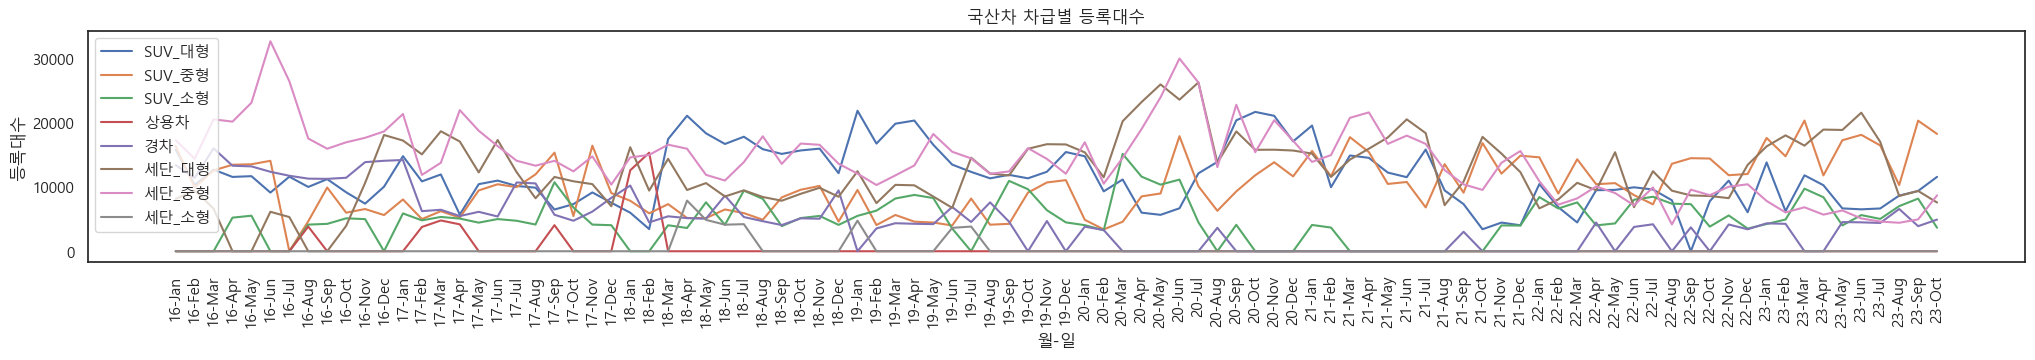

In [8]:
fig = plt.figure(figsize=(25, 3))
for i in ctyliG.keys():
    plt.plot(ctyliG.index.tolist(), ctyliG[i], label=i)
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("국산차 차급별 등록대수")
plt.xticks(ctyliG.index.tolist(), rotation=90)
plt.legend(loc="best")

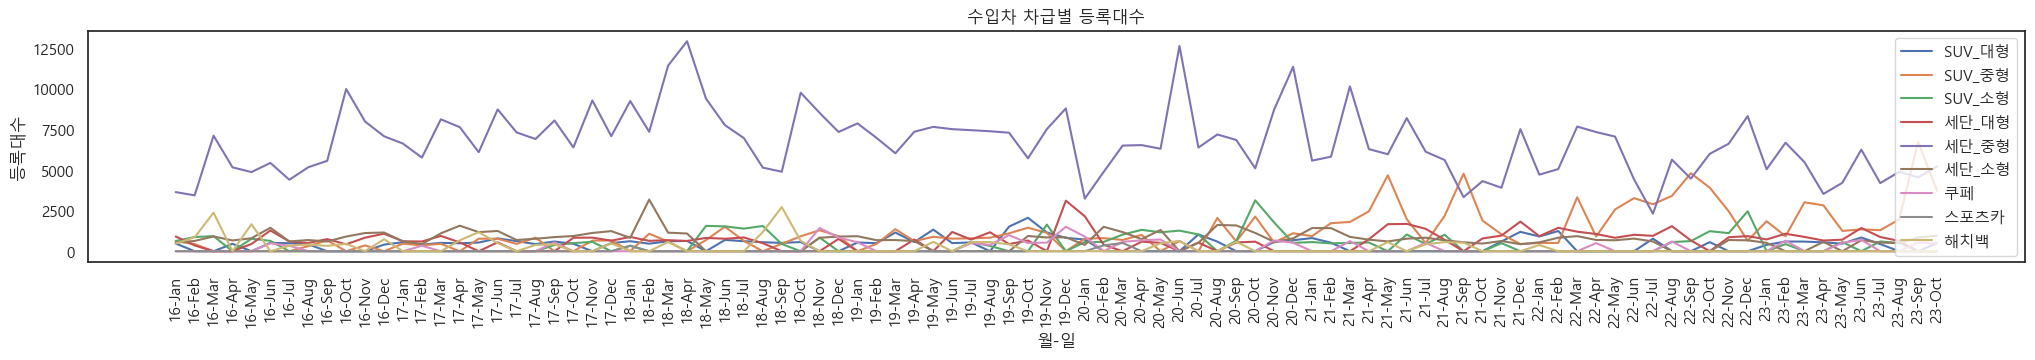

In [9]:
fig = plt.figure(figsize=(25, 3))
for i in ctyliS.keys():
    plt.plot(ctyliS.index.tolist(), ctyliS[i], label=i)
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("수입차 차급별 등록대수")
plt.xticks(ctyliS.index.tolist(), rotation=90)
plt.legend(loc="best")

In [10]:
def sumt(ctyli,car):
    result=pd.DataFrame({'총계' : [0]*len(car)}, index=car.index.to_list())
    for i in ctyli.keys():
        result['총계']+=ctyli[i]
    return result

([<matplotlib.axis.XTick at 0x2ba1a56b110>,
 [Text(0.0, 0, '16-Jan'),
  Text(1.0, 0, '16-Feb'),
  Text(2.0, 0, '16-Mar'),
  Text(3.0, 0, '16-Apr'),
  Text(4.0, 0, '16-May'),
  Text(5.0, 0, '16-Jun'),
  Text(6.0, 0, '16-Jul'),
  Text(7.0, 0, '16-Aug'),
  Text(8.0, 0, '16-Sep'),
  Text(9.0, 0, '16-Oct'),
  Text(10.0, 0, '16-Nov'),
  Text(11.0, 0, '16-Dec'),
  Text(12.0, 0, '17-Jan'),
  Text(13.0, 0, '17-Feb'),
  Text(14.0, 0, '17-Mar'),
  Text(15.0, 0, '17-Apr'),
  Text(16.0, 0, '17-May'),
  Text(17.0, 0, '17-Jun'),
  Text(18.0, 0, '17-Jul'),
  Text(19.0, 0, '17-Aug'),
  Text(20.0, 0, '17-Sep'),
  Text(21.0, 0, '17-Oct'),
  Text(22.0, 0, '17-Nov'),
  Text(23.0, 0, '17-Dec'),
  Text(24.0, 0, '18-Jan'),
  Text(25.0, 0, '18-Feb'),
  Text(26.0, 0, '18-Mar'),
  Text(27.0, 0, '18-Apr'),
  Text(28.0, 0, '18-May'),
  Text(29.0, 0, '18-Jun'),
  Text(30.0, 0, '18-Jul'),
  Text(31.0, 0, '18-Aug'),
  Text(32.0, 0, '18-Sep'),
  Text(33.0, 0, '18-Oct'),
  Text(34.0, 0, '18-Nov'),
  Text(35.0, 0, '18-D

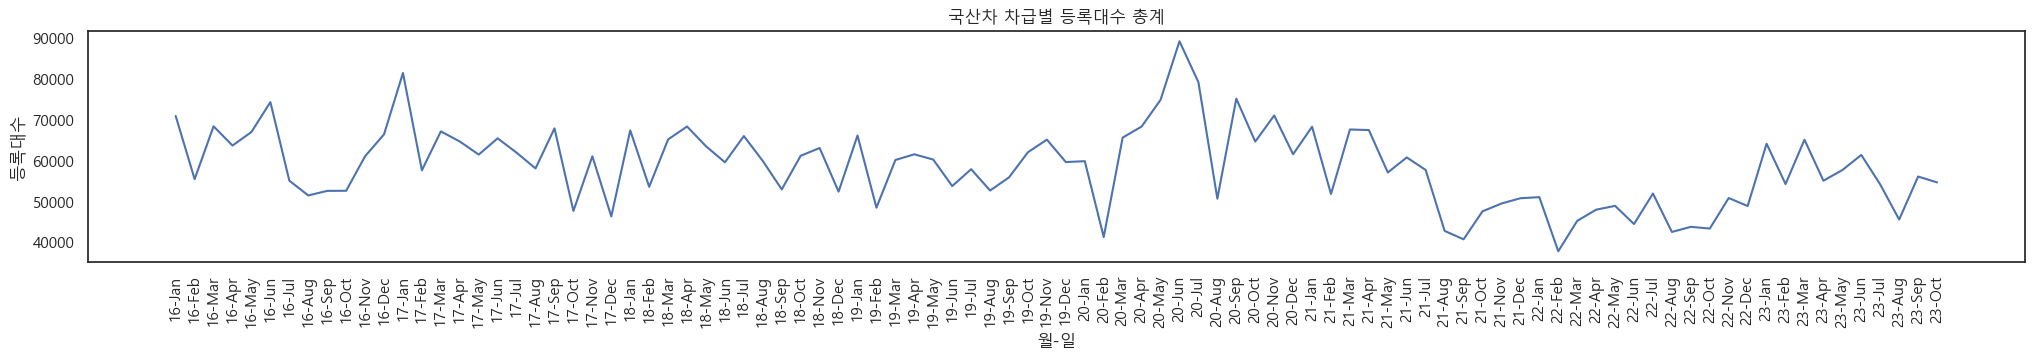

In [11]:
fig = plt.figure(figsize=(25, 3))
plt.plot(carG.index.tolist(), sumt(ctyliG,carG))
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("국산차 차급별 등록대수 총계")
plt.xticks(ctyliG.index.tolist(), rotation=90)

([<matplotlib.axis.XTick at 0x2ba1b224ad0>,
 [Text(0.0, 0, '16-Jan'),
  Text(1.0, 0, '16-Feb'),
  Text(2.0, 0, '16-Mar'),
  Text(3.0, 0, '16-Apr'),
  Text(4.0, 0, '16-May'),
  Text(5.0, 0, '16-Jun'),
  Text(6.0, 0, '16-Jul'),
  Text(7.0, 0, '16-Aug'),
  Text(8.0, 0, '16-Sep'),
  Text(9.0, 0, '16-Oct'),
  Text(10.0, 0, '16-Nov'),
  Text(11.0, 0, '16-Dec'),
  Text(12.0, 0, '17-Jan'),
  Text(13.0, 0, '17-Feb'),
  Text(14.0, 0, '17-Mar'),
  Text(15.0, 0, '17-Apr'),
  Text(16.0, 0, '17-May'),
  Text(17.0, 0, '17-Jun'),
  Text(18.0, 0, '17-Jul'),
  Text(19.0, 0, '17-Aug'),
  Text(20.0, 0, '17-Sep'),
  Text(21.0, 0, '17-Oct'),
  Text(22.0, 0, '17-Nov'),
  Text(23.0, 0, '17-Dec'),
  Text(24.0, 0, '18-Jan'),
  Text(25.0, 0, '18-Feb'),
  Text(26.0, 0, '18-Mar'),
  Text(27.0, 0, '18-Apr'),
  Text(28.0, 0, '18-May'),
  Text(29.0, 0, '18-Jun'),
  Text(30.0, 0, '18-Jul'),
  Text(31.0, 0, '18-Aug'),
  Text(32.0, 0, '18-Sep'),
  Text(33.0, 0, '18-Oct'),
  Text(34.0, 0, '18-Nov'),
  Text(35.0, 0, '18-D

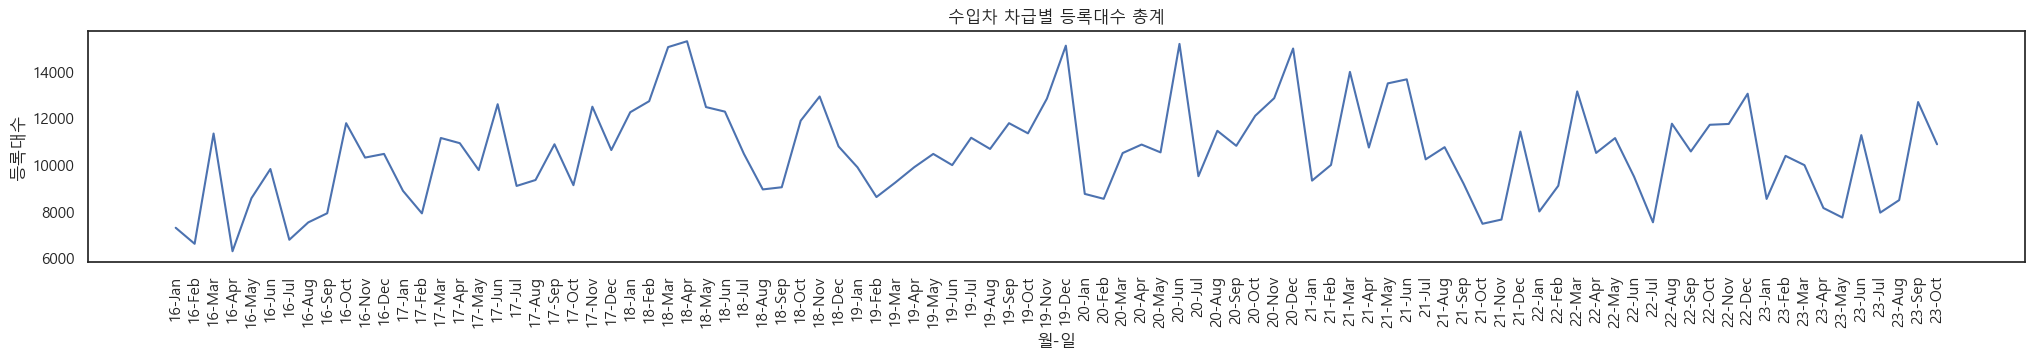

In [12]:
fig = plt.figure(figsize=(25, 3))
plt.plot(carS.index.tolist(), sumt(ctyliS,carS))
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("수입차 차급별 등록대수 총계")
plt.xticks(ctyliS.index.tolist(), rotation=90)

In [13]:
def sumT(ctyli,car,divide):
    dic=dict()
    for i in divide:
        dic[i]=[0]*len(car)
    result=pd.DataFrame(dic, index=car.index.to_list())
    for i in ctyli.keys():
        for j in result.keys():
            if j in i:
                result[j]+=ctyli[i]
    return result

carG_isSUV=sumT(ctyliG,carG,['SUV','세단','경차'])
carS_isSUV=pd.DataFrame({'SUV':[0]*len(carS), '!SUV':[0]*len(carS)}, index=carS.index.to_list())
for i in ctyliS.keys():
    if 'SUV' in i:
        carS_isSUV['SUV']+=ctyliS[i]
    else:
        carS_isSUV['!SUV']+=ctyliS[i]

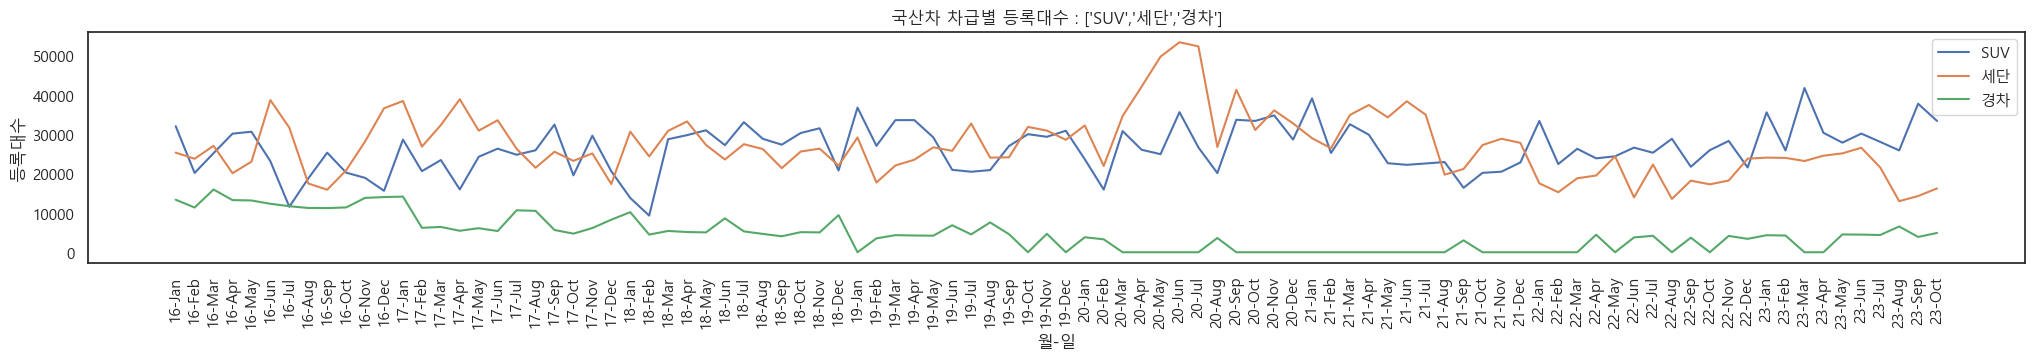

In [14]:
fig = plt.figure(figsize=(25, 3))
for i in carG_isSUV.keys():
    plt.plot(carG_isSUV.index.tolist(), carG_isSUV[i], label=i)
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("국산차 차급별 등록대수 : ['SUV','세단','경차']")
plt.xticks(carG_isSUV.index.tolist(), rotation=90)
plt.legend(loc="best")

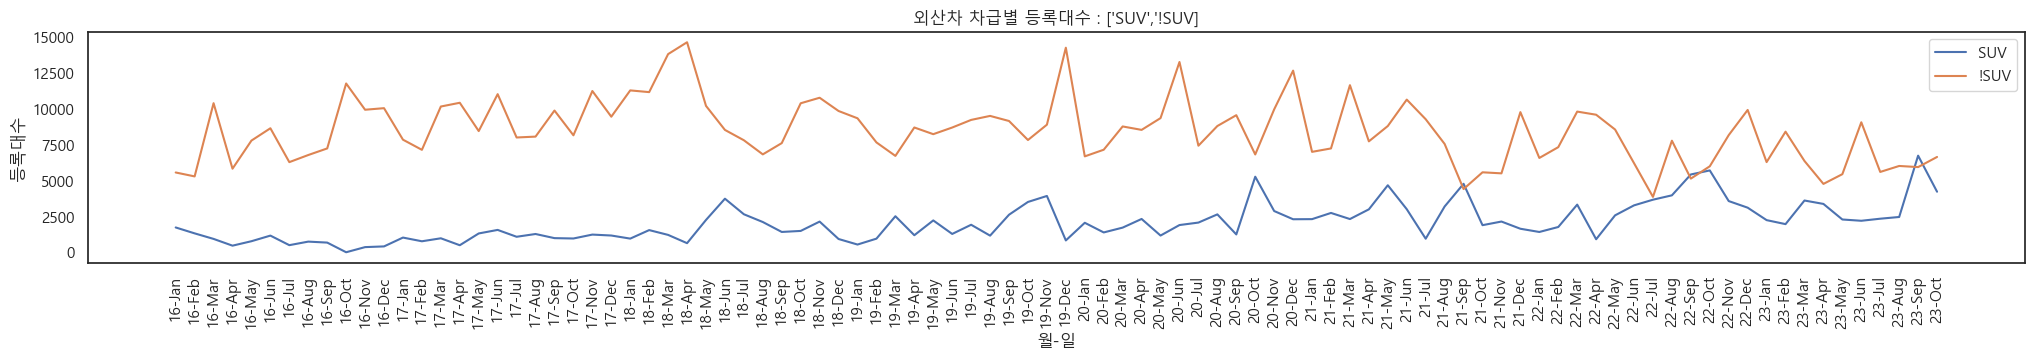

In [15]:
fig = plt.figure(figsize=(25, 3))
for i in carS_isSUV.keys():
    plt.plot(carS_isSUV.index.tolist(), carS_isSUV[i], label=i)
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("외산차 차급별 등록대수 : ['SUV','!SUV]")
plt.xticks(carS_isSUV.index.tolist(), rotation=90)
plt.legend(loc="best")

In [15]:
def npcv(car):
    temp=car.fillna(0)
    result=dict({'std': [], 'mean': [], 'cv': []})
    for i in temp.index.tolist():
        dummy=[]
        for j in temp.keys():
            if temp.loc[i,j]!=0:
                dummy.append(temp.loc[i,j])
        std=np.std(dummy)
        mean=np.mean(dummy)
        cv = std / mean
        result['std'].append(std)
        result['mean'].append(mean)
        result['cv'].append(cv)
    return result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


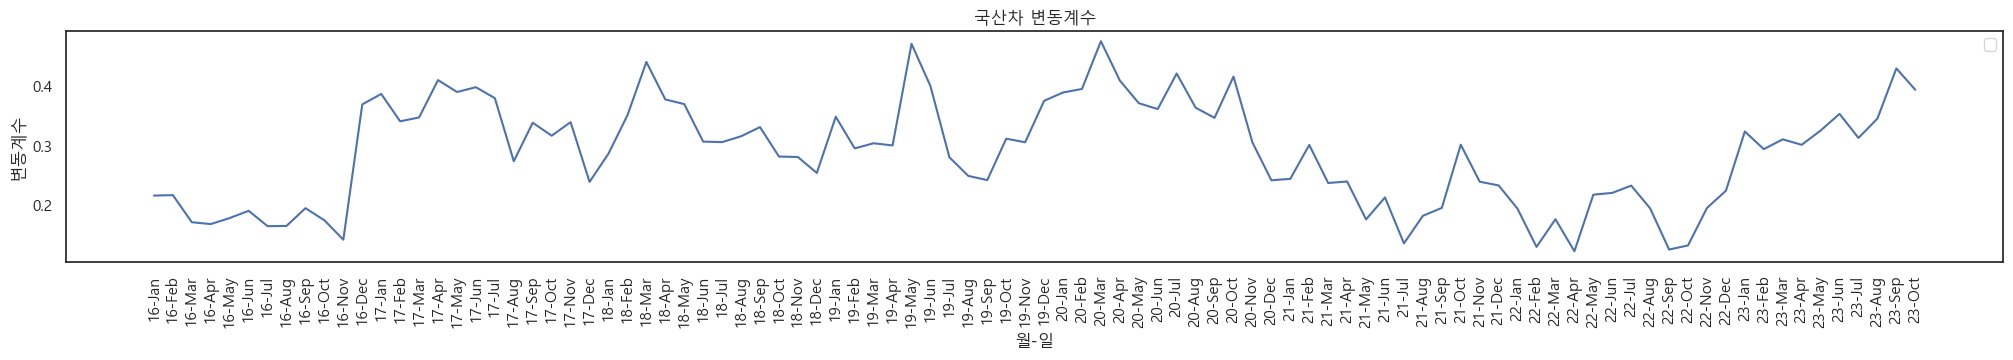

In [16]:
fig = plt.figure(figsize=(25, 3))
plt.plot(carG.index.tolist(), npcv(carG)['cv'])
plt.xlabel("월-일")
plt.ylabel("변동계수")
plt.title("국산차 변동계수")
plt.xticks(carG.index.tolist(), rotation=90)
plt.legend(loc="best")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


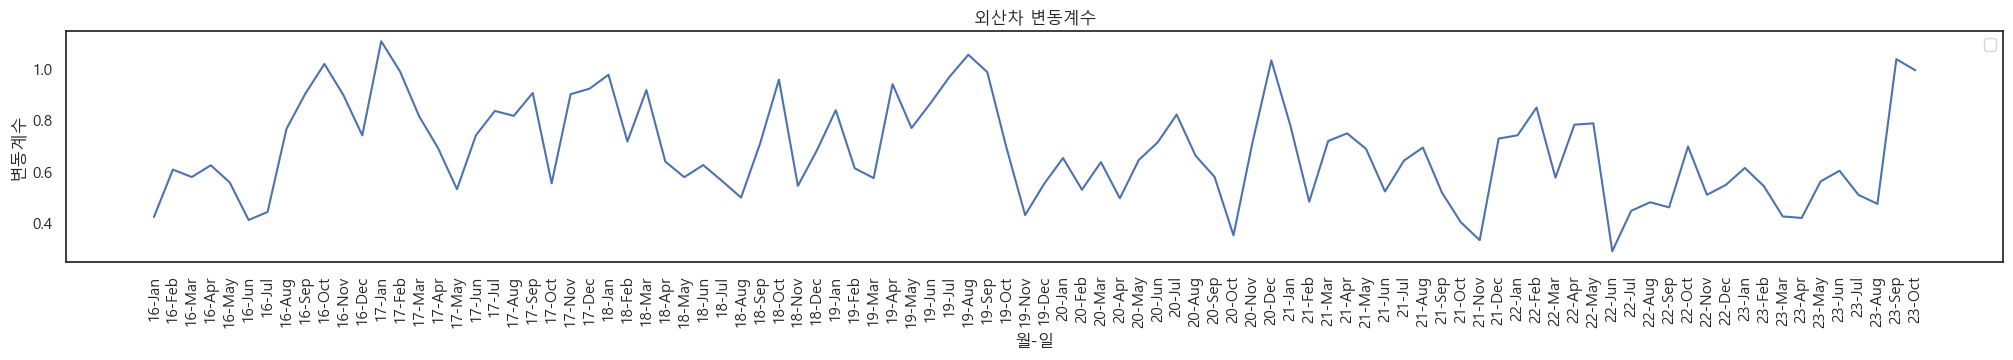

In [17]:
fig = plt.figure(figsize=(25, 3))
plt.plot(carS.index.tolist(), npcv(carS)['cv'])
plt.xlabel("월-일")
plt.ylabel("변동계수")
plt.title("외산차 변동계수")
plt.xticks(carS.index.tolist(), rotation=90)
plt.legend(loc="best")

In [18]:
def Ggraph():
    print(carG.keys())
    name=input("이름을 입력하세요")
    for i in carG.keys():
        if name in i:
            name=i
            break
    for j in naverG:
        if j in name:
            howsearch(j,naverG)
            break
    try:
        fig = plt.figure(figsize=(25, 3))
        plt.plot(carG.index.tolist(), carG[name])
        plt.xlabel("월-일")
        plt.ylabel("등록대수")
        plt.title(f"{name} 월별 등록대수")
        plt.xticks(ctyliG.index.tolist(), rotation=90)
    except:
        print("잘못된 값 입력")

        
def Sgraph():
    print(carS.keys())
    name=input("이름을 입력하세요")
    for i in carS.keys():
        if name in i:
            name=i
    howsearch(name,naverS)
    try:
        fig = plt.figure(figsize=(25, 3))
        plt.plot(carS.index.tolist(), carS[name])
        plt.xlabel("월-일")
        plt.ylabel("등록대수")
        plt.title(f"{name} 월별 등록대수")
        plt.xticks(carS.index.tolist(), rotation=90)
    except:
        print("잘못된 값 입력")

def howsearch(name,naver):
    for i in naver.keys():
        if name in i:
            try:
                fig = plt.figure(figsize=(25, 3))
                plt.plot(carG.index.tolist(), naver[i])
                plt.xlabel("월-일")
                plt.ylabel("검색량")
                plt.title(f"{i} 월별 네이버 검색량")
                plt.xticks(carG.index.tolist(), rotation=90)
                break
            except:
                print("잘못된 값 입력-네이버")

Index(['기아 쏘렌토', '현대 싼타페', '현대 그랜저', '기아 레이', '현대 아반떼', '기아 스포티지', '현대 쏘나타',
       '기아 카니발', '현대 캐스퍼', '제네시스 GV70', '기아 셀토스', '현대 투싼', '현대 팰리세이드', '기아 모닝',
       '기아 K8', '제네시스 G80', '현대 코나', 'KG 모빌리티 토레스', '현대 아이오닉 6', '기아 니로',
       '현대 아이오닉 5', '기아 K5', '르노코리아 QM6', '기아 K7', '르노코리아 XM3', '제네시스 GV80',
       '현대 베뉴', '쉐보레 스파크', '기아 K3', 'KG 모빌리티 티볼리', 'KG 모빌리티 렉스턴 스포츠', '현대 포터',
       '기아 봉고', '현대 스타렉스', '르노코리아 SM6', '쉐보레 말리부'],
      dtype='object')


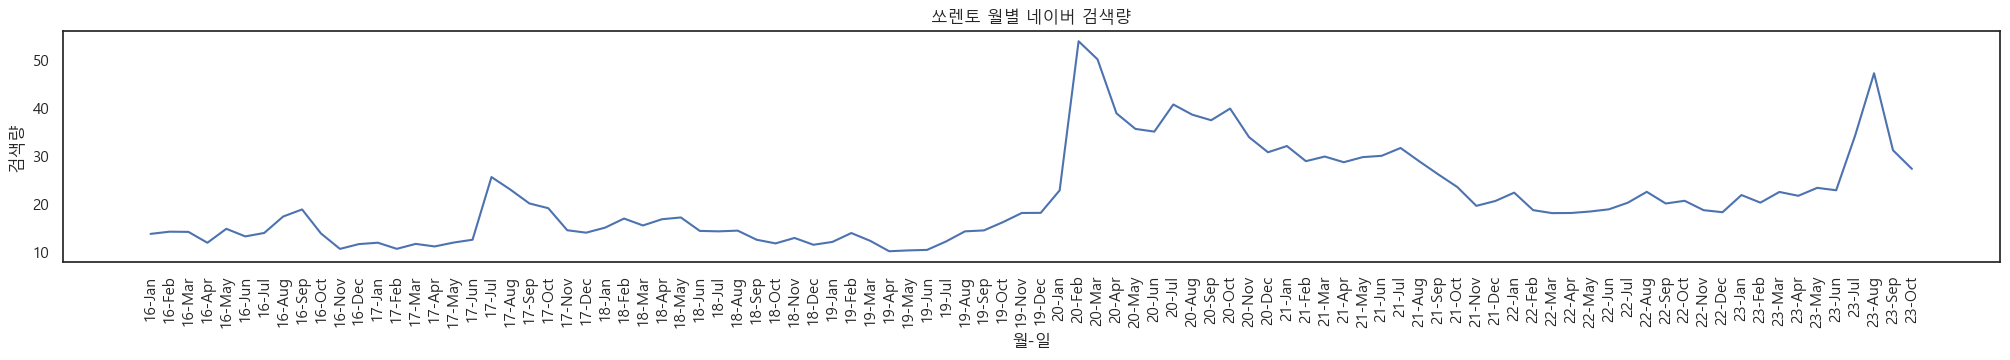

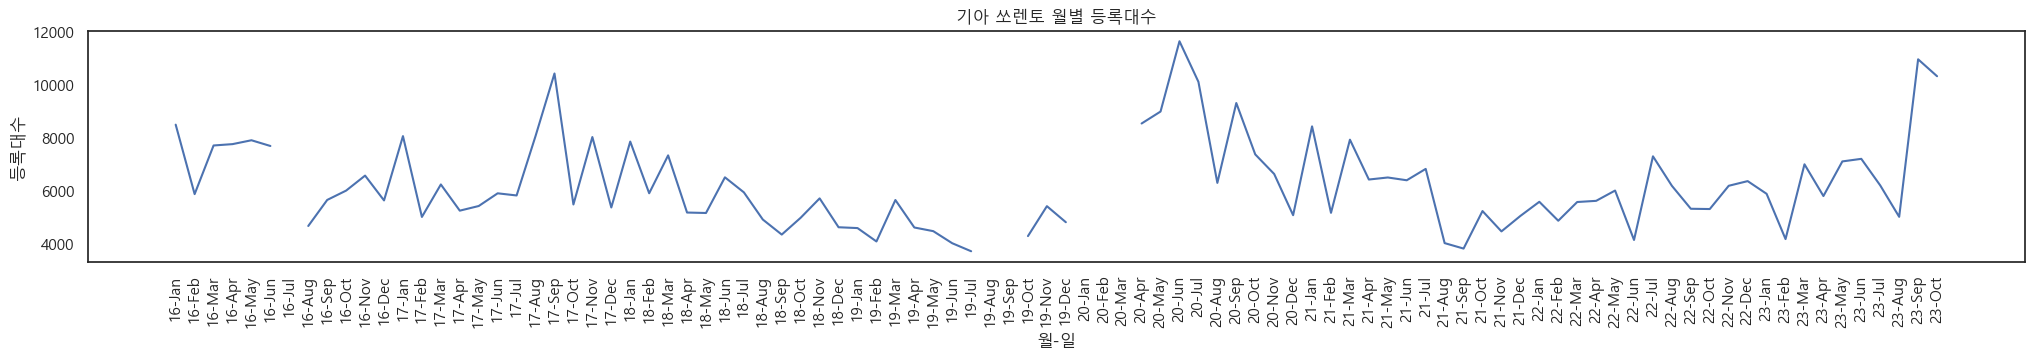

In [141]:
Ggraph()

Index(['벤츠 E클래스', '테슬라 모델 Y', 'BMW 3시리즈', 'BMW 5시리즈', '렉서스 ES', 'BMW X7',
       'BMW 6시리즈', '아우디 A6', '볼보 XC60', '벤츠 GLC', '벤츠 GLE', 'BMW X5',
       'BMW iX3', '벤츠 S클래스', '벤츠 C클래스', '폭스바겐 티구안', '테슬라 모델 X', '포르쉐 카이엔',
       'BMW X3', 'BMW X4', '지프 체로키', '벤츠 GLA', '벤츠 A클래스', '볼보 S90',
       '아우디 Q4 e-트론', '폭스바겐 ID.4', '테슬라 모델 3', '포드 익스플로러', '벤츠 GLB',
       '폴스타 폴스타 2', '벤츠 CLA', 'BMW X6', '미니 미니 해치', '아우디 A4', '지프 그랜드 체로키',
       '볼보 XC40', '폭스바겐 제타', '폭스바겐 티록', '벤츠 CLS', '지프 랭글러', '벤츠 G클래스',
       '닛산 알티마', '포르쉐 파나메라', '폭스바겐 아테온', '혼다 어코드', '아우디 Q7', '혼다 파일럿',
       '아우디 A5', '토요타 캠리', '랜드로버 디스커버리 스포츠', '폭스바겐 파사트', '아우디 A3', '토요타 프리우스',
       '랜드로버 디스커버리', 'BMW 1시리즈', '재규어 XF', 'BMW 4시리즈', 'BMW 7시리즈', '폭스바겐 골프'],
      dtype='object')


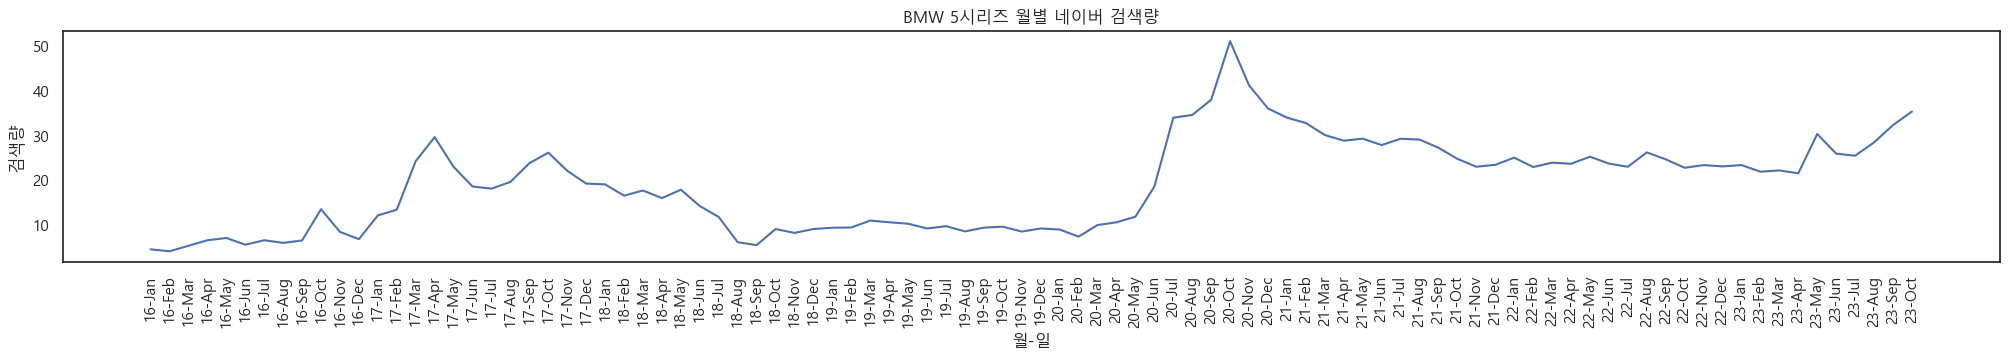

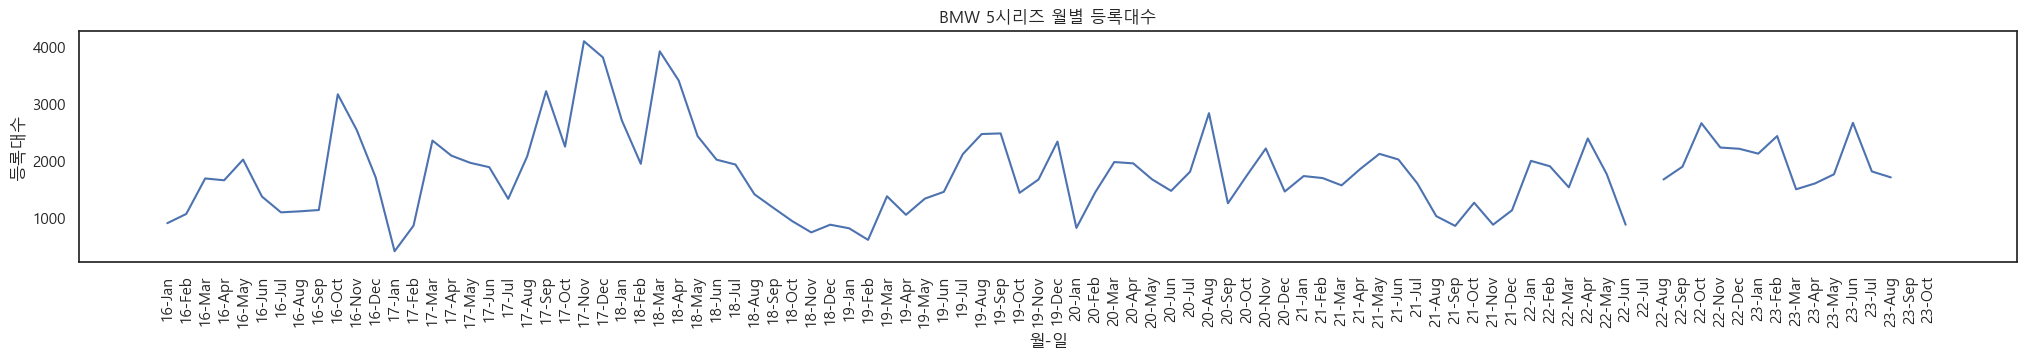

In [398]:
Sgraph()

In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
dr=webdriver.Chrome()
dr.get("https://datalab.naver.com/keyword/trendSearch.naver")

In [20]:
num=0
def sett(car):
    global num
    li=car.keys()[num:num+5]
    li=list(map(lambda x: x.split(' ', 1)[1], li))
    num+=5
    return li

In [336]:
temp=[]
nametemp=sett(carS)
xbut=dr.find_elements(By.CLASS_NAME,'btn_keyword_del')
for i in xbut:
    i.click()
for i in range(5):
    temp.append(dr.find_element(By.ID,f"item_keyword{i+1}"))
for i in range(5):
    try:
        temp[i].send_keys(f"{nametemp[i]}")
    except:
        break
dr.find_element(By.ID,"timeDimensionTitle").click()
time.sleep(0.2)
dr.find_element(By.XPATH,"""//a[text()='월간']""").click()

dr.find_element(By.ID,"startYear").click()
time.sleep(0.2)
dr.find_element(By.XPATH,"""//a[text()='2016']""").click()

dr.find_element(By.ID,"startMonth").click()
time.sleep(0.2)
dr.find_element(By.XPATH,"""//a[text()='01']""").click()

dr.find_element(By.ID,"endMonth").click()
time.sleep(0.2)
dr.find_element(By.XPATH,"""//*[@id="endMonthDiv"]/ul/li/a[text()='10']""").click()

In [203]:
def scatterG():
    name=input("산포도 검색할 국산 차량 입력")
    for i in carG.keys():
        if name in i:
            carname=i
            break
    for i in naverG.keys():
        if name in i:
            navername=i
            break
    fig = plt.figure(figsize=(25, 6))
    #plt.scatter(naverG[navername].iloc[0:len(naverG)-1], carG[carname].iloc[1:])
    plt.xlabel("검색량")
    plt.ylabel("등록대수")
    plt.title(f"{carname} 산포도")
    
    sc.regplot(x=naverG[navername].iloc[0:len(naverG)-1], y= carG[carname].iloc[1:])
    
    temp=pd.DataFrame({"검색량":list(naverG[navername].iloc[0:len(naverG)-1]),"등록량":carG[carname].iloc[1:]},index=carG.index.to_list()[1:])
    temp=temp.loc[temp['등록량'].notna()]
    correlation, pvalue = stats.pearsonr(temp['검색량'], temp['등록량'])
    print(f"피어슨 상관 계수 {correlation},pvalue {pvalue}")
    return correlation, pvalue
def scatterS():
    name=input("산포도 검색할 외산 차량 입력")
    for i in carS.keys():
        if name in i:
            carname=i
            break
    #plt.scatter(naverS[carname].iloc[0:len(naverS)-1], carS[carname].iloc[1:])
    plt.xlabel("검색량")
    plt.ylabel("등록대수")
    plt.title(f"{carname} 산포도")
    sc.regplot(x=naverS[carname].iloc[0:len(naverS)-1], y= carS[carname].iloc[1:])
    temp=pd.DataFrame({"검색량":list(naverS[carname].iloc[0:len(naverS)-1]),"등록량":carS[carname].iloc[1:]},index=carS.index.to_list()[1:])
    temp=temp.loc[temp['등록량'].notna()]
    correlation, pvalue = stats.pearsonr(temp['검색량'], temp['등록량'])
    print(f"피어슨 상관 계수 {correlation},pvalue {pvalue}")
    return correlation, pvalue
def corG(name):
    for i in carG.keys():
        if name in i:
            carname=i
            break
    for i in naverG.keys():
        if name in i:
            navername=i
            break
    temp=pd.DataFrame({"검색량":list(naverG[navername].iloc[0:len(naverG)-1]),"등록량":carG[carname].iloc[1:]},index=carG.index.to_list()[1:])
    temp=temp.loc[temp['등록량'].notna()]
    correlation, pvalue = stats.pearsonr(temp['검색량'], temp['등록량'])
    return [correlation, pvalue]
def corS(name):
    for i in carS.keys():
        if name in i:
            carname=i
            break
    temp=pd.DataFrame({"검색량":list(naverS[carname].iloc[0:len(naverS)-1]),"등록량":carS[carname].iloc[1:]},index=carS.index.to_list()[1:])
    temp=temp.loc[temp['등록량'].notna()]
    correlation, pvalue = stats.pearsonr(temp['검색량'], temp['등록량'])
    return [correlation, pvalue]

피어슨 상관 계수 0.4917793081213794,pvalue 1.3163950412893733e-06


(0.4917793081213794, 1.3163950412893733e-06)

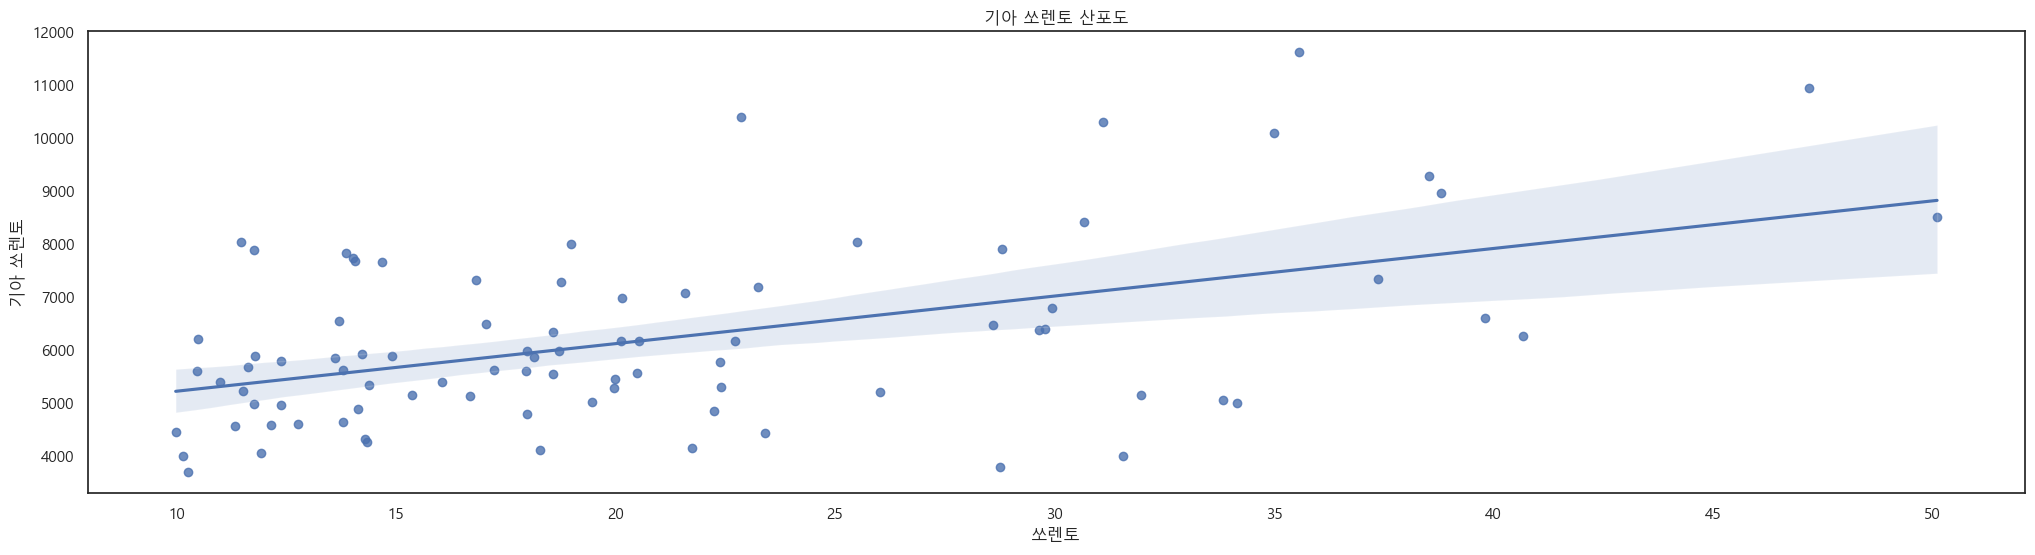

In [202]:
scatterG()

피어슨 상관 계수 -0.18108388364992617,pvalue 0.39710580845861965


(-0.18108388364992617, 0.39710580845861965)

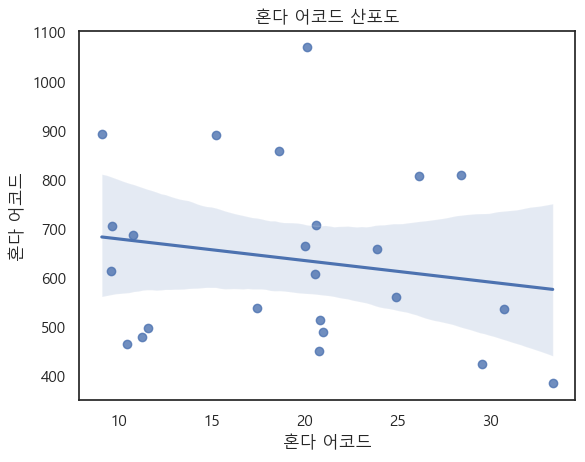

In [206]:
scatterS()

([<matplotlib.axis.XTick at 0x167f85250d0>,
 [Text(0.0, 0, '16-Jan'),
  Text(1.0, 0, '16-Feb'),
  Text(2.0, 0, '16-Mar'),
  Text(3.0, 0, '16-Apr'),
  Text(4.0, 0, '16-May'),
  Text(5.0, 0, '16-Jun'),
  Text(6.0, 0, '16-Jul'),
  Text(7.0, 0, '16-Aug'),
  Text(8.0, 0, '16-Sep'),
  Text(9.0, 0, '16-Oct'),
  Text(10.0, 0, '16-Nov'),
  Text(11.0, 0, '16-Dec'),
  Text(12.0, 0, '17-Jan'),
  Text(13.0, 0, '17-Feb'),
  Text(14.0, 0, '17-Mar'),
  Text(15.0, 0, '17-Apr'),
  Text(16.0, 0, '17-May'),
  Text(17.0, 0, '17-Jun'),
  Text(18.0, 0, '17-Jul'),
  Text(19.0, 0, '17-Aug'),
  Text(20.0, 0, '17-Sep'),
  Text(21.0, 0, '17-Oct'),
  Text(22.0, 0, '17-Nov'),
  Text(23.0, 0, '17-Dec'),
  Text(24.0, 0, '18-Jan'),
  Text(25.0, 0, '18-Feb'),
  Text(26.0, 0, '18-Mar'),
  Text(27.0, 0, '18-Apr'),
  Text(28.0, 0, '18-May'),
  Text(29.0, 0, '18-Jun'),
  Text(30.0, 0, '18-Jul'),
  Text(31.0, 0, '18-Aug'),
  Text(32.0, 0, '18-Sep'),
  Text(33.0, 0, '18-Oct'),
  Text(34.0, 0, '18-Nov'),
  Text(35.0, 0, '18-D

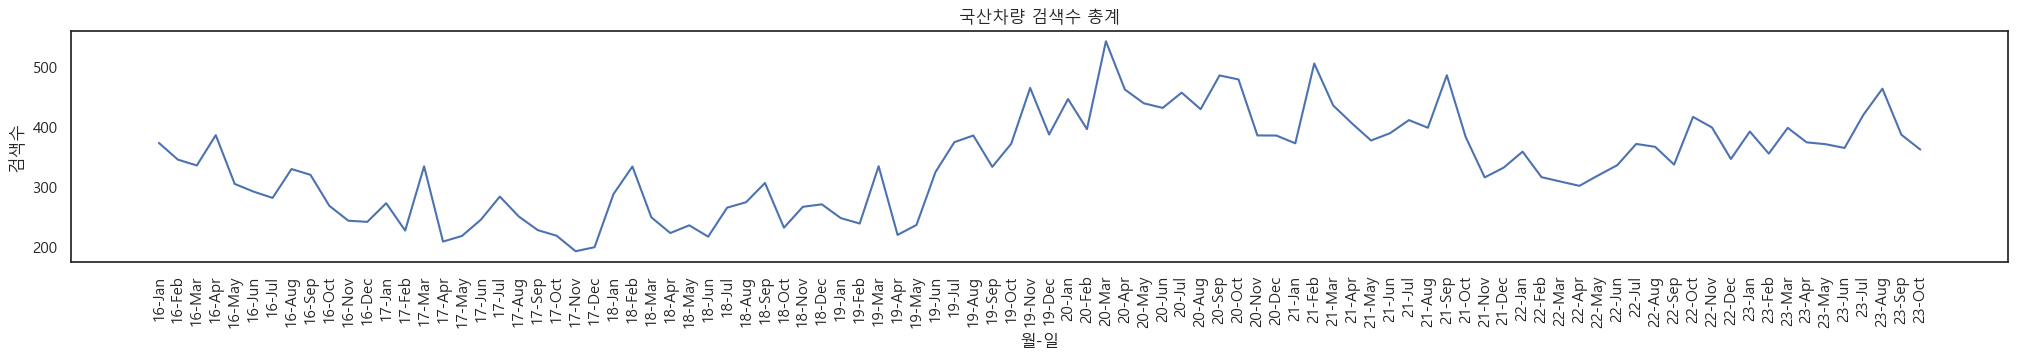

In [42]:
temp=[]
for i in range(len(naverG)):
    temp.append(sum(naverG.iloc[i]))
resG=pd.DataFrame({'검색량 총계': temp},index=carG.index.tolist())


fig = plt.figure(figsize=(25, 3))
plt.plot(carG.index.tolist(), resG)
plt.xlabel("월-일")
plt.ylabel("검색수")
plt.title("국산차량 검색수 총계")
plt.xticks(ctyliG.index.tolist(), rotation=90)

([<matplotlib.axis.XTick at 0x167ee677090>,
 [Text(0.0, 0, '16-Jan'),
  Text(1.0, 0, '16-Feb'),
  Text(2.0, 0, '16-Mar'),
  Text(3.0, 0, '16-Apr'),
  Text(4.0, 0, '16-May'),
  Text(5.0, 0, '16-Jun'),
  Text(6.0, 0, '16-Jul'),
  Text(7.0, 0, '16-Aug'),
  Text(8.0, 0, '16-Sep'),
  Text(9.0, 0, '16-Oct'),
  Text(10.0, 0, '16-Nov'),
  Text(11.0, 0, '16-Dec'),
  Text(12.0, 0, '17-Jan'),
  Text(13.0, 0, '17-Feb'),
  Text(14.0, 0, '17-Mar'),
  Text(15.0, 0, '17-Apr'),
  Text(16.0, 0, '17-May'),
  Text(17.0, 0, '17-Jun'),
  Text(18.0, 0, '17-Jul'),
  Text(19.0, 0, '17-Aug'),
  Text(20.0, 0, '17-Sep'),
  Text(21.0, 0, '17-Oct'),
  Text(22.0, 0, '17-Nov'),
  Text(23.0, 0, '17-Dec'),
  Text(24.0, 0, '18-Jan'),
  Text(25.0, 0, '18-Feb'),
  Text(26.0, 0, '18-Mar'),
  Text(27.0, 0, '18-Apr'),
  Text(28.0, 0, '18-May'),
  Text(29.0, 0, '18-Jun'),
  Text(30.0, 0, '18-Jul'),
  Text(31.0, 0, '18-Aug'),
  Text(32.0, 0, '18-Sep'),
  Text(33.0, 0, '18-Oct'),
  Text(34.0, 0, '18-Nov'),
  Text(35.0, 0, '18-D

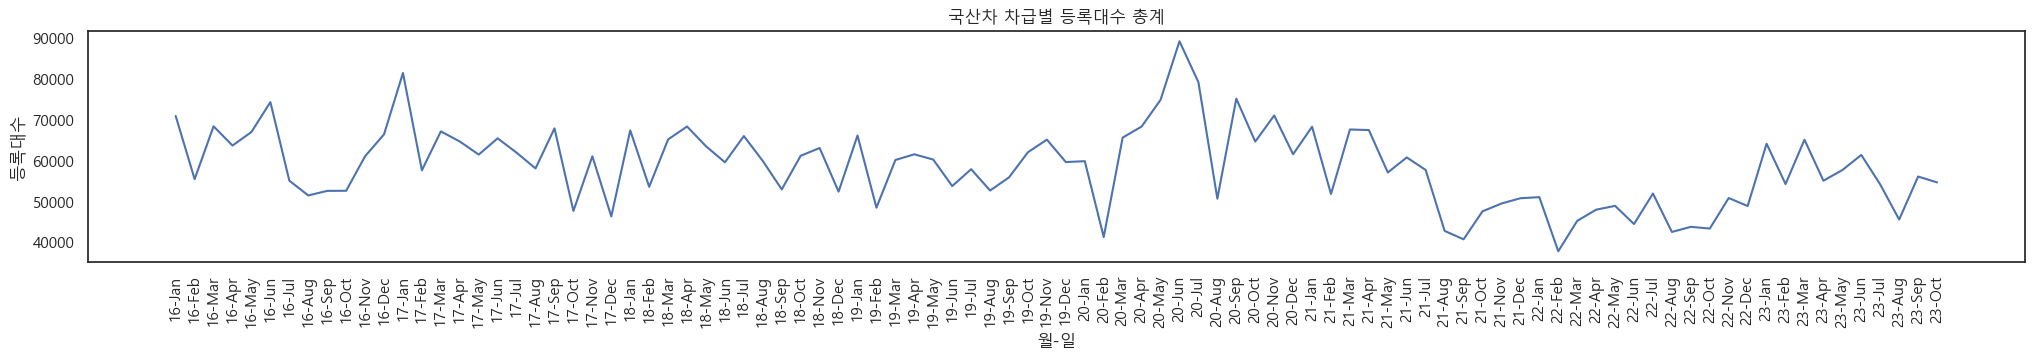

In [20]:
fig = plt.figure(figsize=(25, 3))
plt.plot(carG.index.tolist(), sumt(ctyliG,carG))
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("국산차 차급별 등록대수 총계")
plt.xticks(ctyliG.index.tolist(), rotation=90)

Text(0.5, 1.0, '국산차 총계 산포도 그래프')

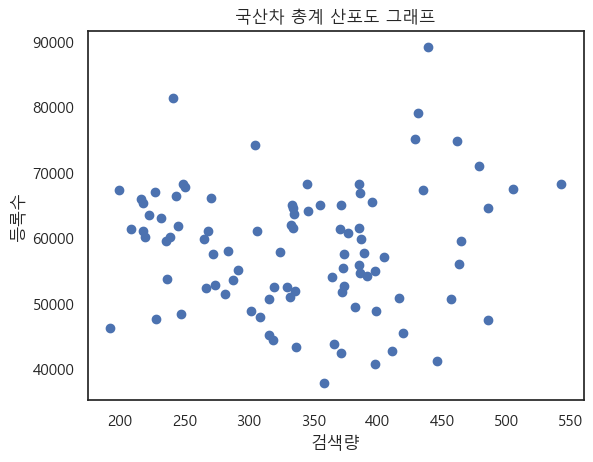

In [34]:
plt.scatter(resG.iloc[0:len(naverG)-1], sumt(ctyliG,carG).iloc[1:])
plt.xlabel("검색량")
plt.ylabel("등록수")
plt.title("국산차 총계 산포도 그래프")

([<matplotlib.axis.XTick at 0x167fbb88050>,
 [Text(0.0, 0, '16-Jan'),
  Text(1.0, 0, '16-Feb'),
  Text(2.0, 0, '16-Mar'),
  Text(3.0, 0, '16-Apr'),
  Text(4.0, 0, '16-May'),
  Text(5.0, 0, '16-Jun'),
  Text(6.0, 0, '16-Jul'),
  Text(7.0, 0, '16-Aug'),
  Text(8.0, 0, '16-Sep'),
  Text(9.0, 0, '16-Oct'),
  Text(10.0, 0, '16-Nov'),
  Text(11.0, 0, '16-Dec'),
  Text(12.0, 0, '17-Jan'),
  Text(13.0, 0, '17-Feb'),
  Text(14.0, 0, '17-Mar'),
  Text(15.0, 0, '17-Apr'),
  Text(16.0, 0, '17-May'),
  Text(17.0, 0, '17-Jun'),
  Text(18.0, 0, '17-Jul'),
  Text(19.0, 0, '17-Aug'),
  Text(20.0, 0, '17-Sep'),
  Text(21.0, 0, '17-Oct'),
  Text(22.0, 0, '17-Nov'),
  Text(23.0, 0, '17-Dec'),
  Text(24.0, 0, '18-Jan'),
  Text(25.0, 0, '18-Feb'),
  Text(26.0, 0, '18-Mar'),
  Text(27.0, 0, '18-Apr'),
  Text(28.0, 0, '18-May'),
  Text(29.0, 0, '18-Jun'),
  Text(30.0, 0, '18-Jul'),
  Text(31.0, 0, '18-Aug'),
  Text(32.0, 0, '18-Sep'),
  Text(33.0, 0, '18-Oct'),
  Text(34.0, 0, '18-Nov'),
  Text(35.0, 0, '18-D

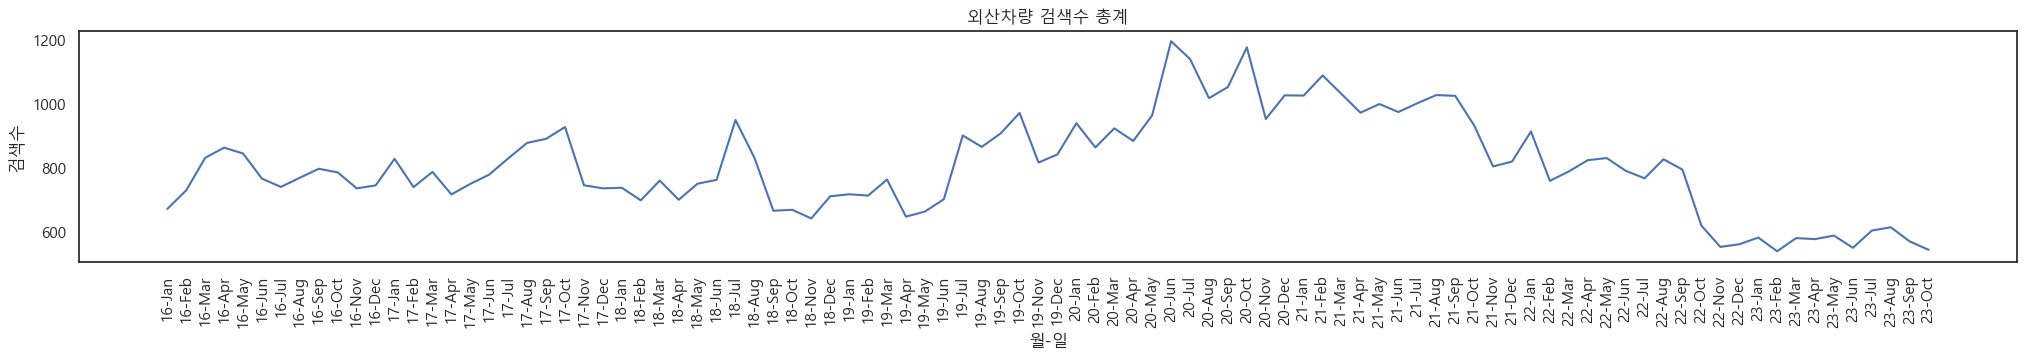

In [69]:
temp=[]
for i in range(len(naverS)):
    temp.append(sum(naverS.iloc[i]))
resS=pd.DataFrame({'검색량 총계': temp},index=carS.index.tolist())


fig = plt.figure(figsize=(25, 3))
plt.plot(carS.index.tolist(), resS)
plt.xlabel("월-일")
plt.ylabel("검색수")
plt.title("외산차량 검색수 총계")
plt.xticks(ctyliS.index.tolist(), rotation=90)

([<matplotlib.axis.XTick at 0x167fbcc5f90>,
 [Text(0.0, 0, '16-Jan'),
  Text(1.0, 0, '16-Feb'),
  Text(2.0, 0, '16-Mar'),
  Text(3.0, 0, '16-Apr'),
  Text(4.0, 0, '16-May'),
  Text(5.0, 0, '16-Jun'),
  Text(6.0, 0, '16-Jul'),
  Text(7.0, 0, '16-Aug'),
  Text(8.0, 0, '16-Sep'),
  Text(9.0, 0, '16-Oct'),
  Text(10.0, 0, '16-Nov'),
  Text(11.0, 0, '16-Dec'),
  Text(12.0, 0, '17-Jan'),
  Text(13.0, 0, '17-Feb'),
  Text(14.0, 0, '17-Mar'),
  Text(15.0, 0, '17-Apr'),
  Text(16.0, 0, '17-May'),
  Text(17.0, 0, '17-Jun'),
  Text(18.0, 0, '17-Jul'),
  Text(19.0, 0, '17-Aug'),
  Text(20.0, 0, '17-Sep'),
  Text(21.0, 0, '17-Oct'),
  Text(22.0, 0, '17-Nov'),
  Text(23.0, 0, '17-Dec'),
  Text(24.0, 0, '18-Jan'),
  Text(25.0, 0, '18-Feb'),
  Text(26.0, 0, '18-Mar'),
  Text(27.0, 0, '18-Apr'),
  Text(28.0, 0, '18-May'),
  Text(29.0, 0, '18-Jun'),
  Text(30.0, 0, '18-Jul'),
  Text(31.0, 0, '18-Aug'),
  Text(32.0, 0, '18-Sep'),
  Text(33.0, 0, '18-Oct'),
  Text(34.0, 0, '18-Nov'),
  Text(35.0, 0, '18-D

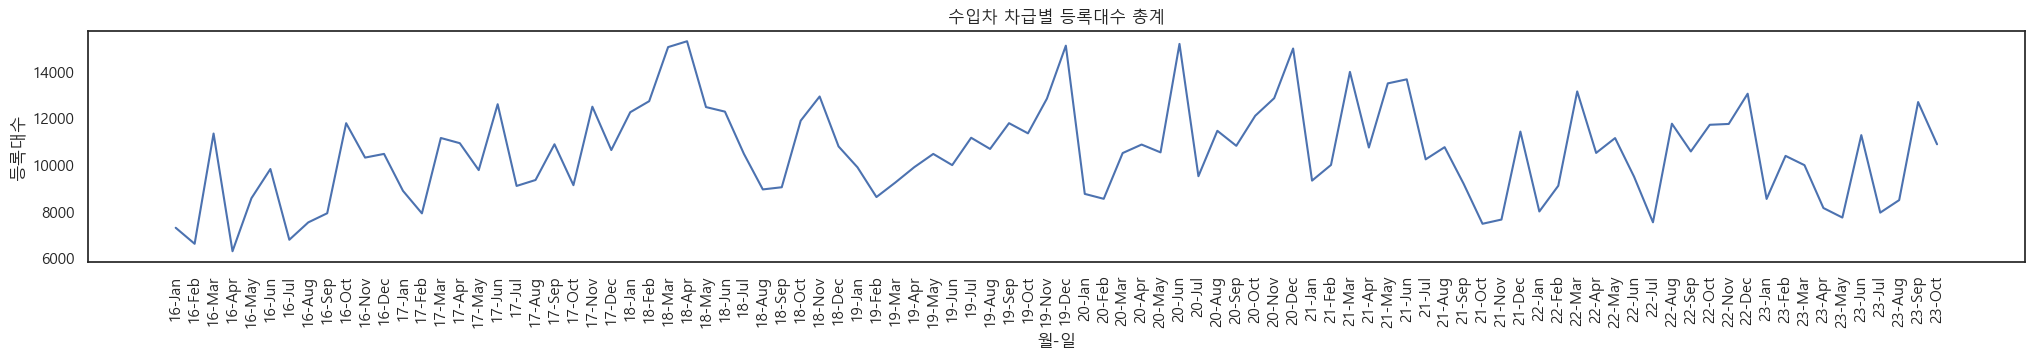

In [70]:
fig = plt.figure(figsize=(25, 3))
plt.plot(carS.index.tolist(), sumt(ctyliS,carS))
plt.xlabel("월-일")
plt.ylabel("등록대수")
plt.title("수입차 차급별 등록대수 총계")
plt.xticks(ctyliS.index.tolist(), rotation=90)

Text(0.5, 1.0, '외산차 총계 산포도 그래프')

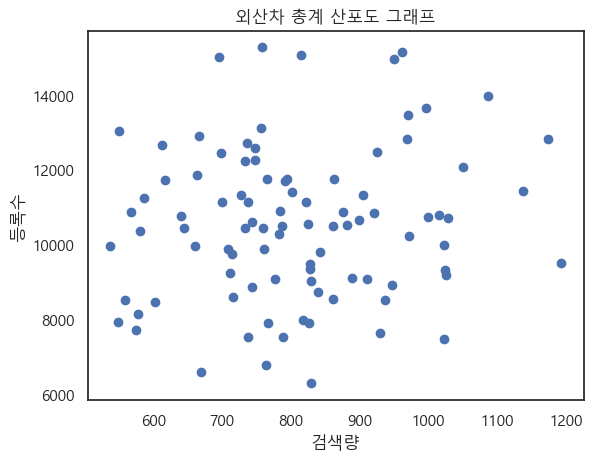

In [72]:
plt.scatter(resS.iloc[0:len(naverS)-1], sumt(ctyliS,carS).iloc[1:])
plt.xlabel("검색량")
plt.ylabel("등록수")
plt.title("외산차 총계 산포도 그래프")

In [125]:
temp=[]
Gcor=pd.DataFrame()
for i in naverG.keys():
    try:
        Gcor[i]=corG(i)
    except:
        temp.append(i)
Gcor.index=['상관계수','p-value']

Text(0.5, 0, '상관계수')

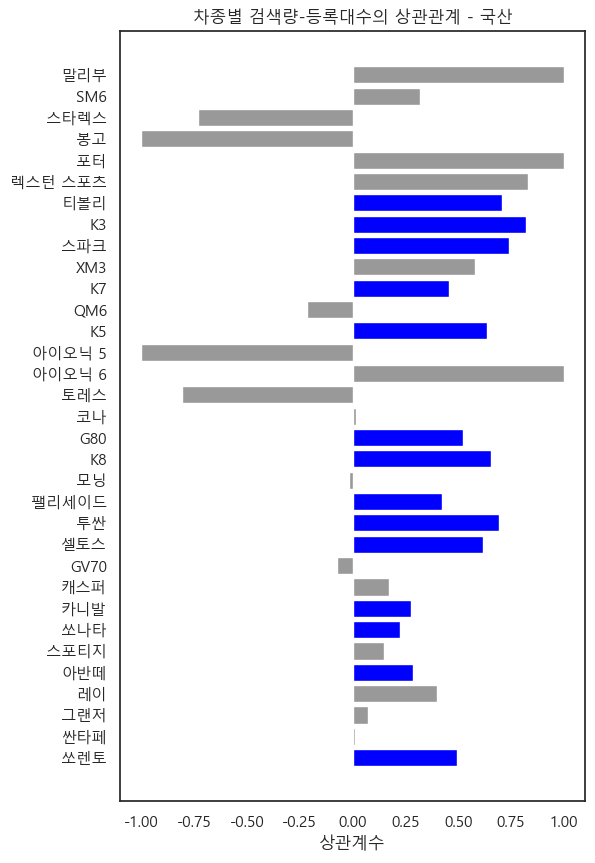

In [194]:
is_significant = [p < 0.05 for p in Gcor.loc['p-value']]
fig = plt.figure(figsize=(6, 10))
plt.barh(y=Gcor.keys(),width=Gcor.loc['상관계수'],color=['#0000FF' if s else '#999999' for s in is_significant])
#plt.yticks(Gcor.keys(), rotation=90)
plt.title("차종별 검색량-등록대수의 상관관계 - 국산")
plt.xlabel("상관계수")

피어슨 상관 계수 0.6944023554125831,pvalue 8.302628456103737e-05


(0.6944023554125831, 8.302628456103737e-05)

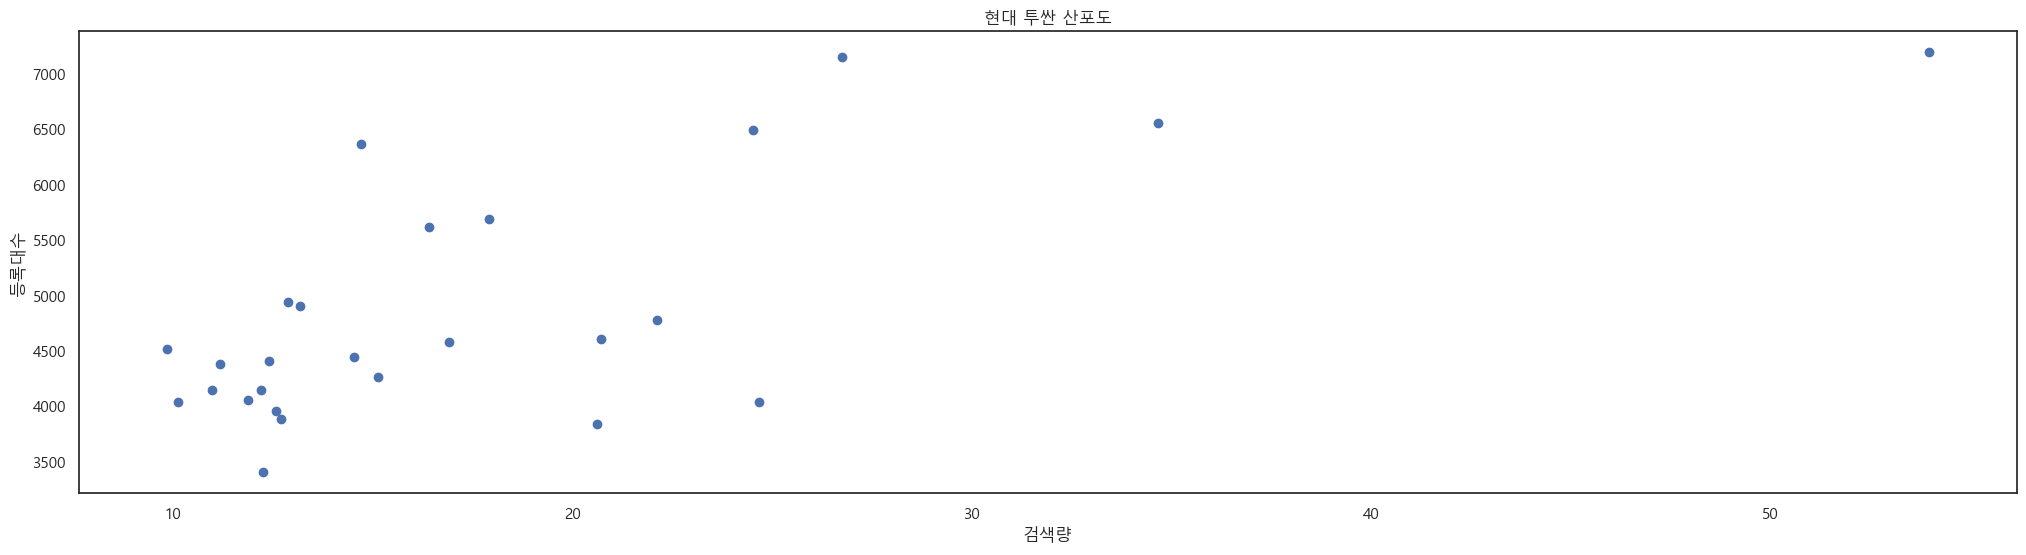

In [161]:
scatterG()

Text(0.5, 0, '상관계수')

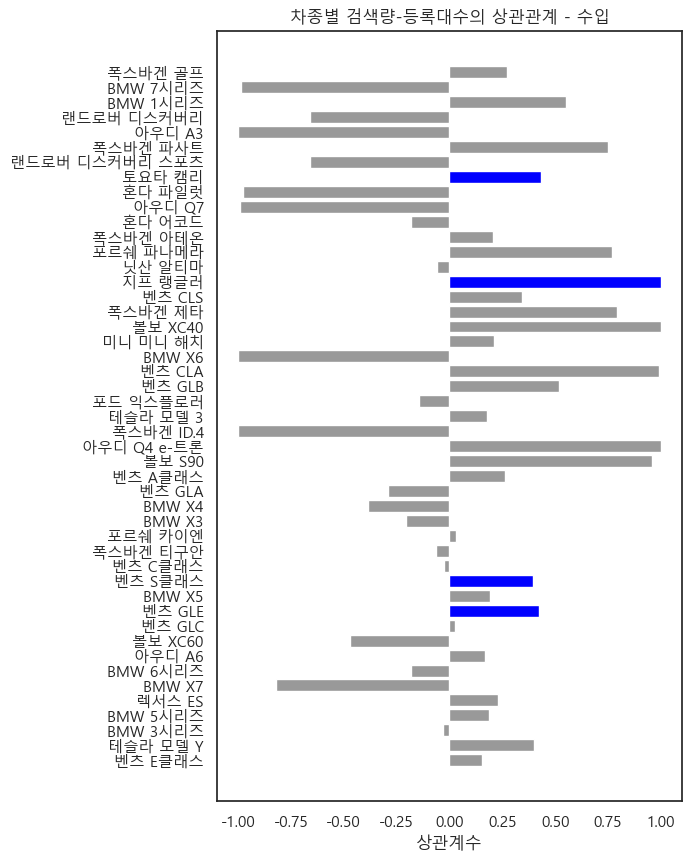

In [192]:
temp=[]
Scor=pd.DataFrame()
for i in naverS.keys():
    try:
        Scor[i]=corS(i)
    except:
        temp.append(i)
Scor.index=['상관계수','p-value']
is_significant = [p < 0.05 for p in Scor.loc['p-value']]
fig = plt.figure(figsize=(6, 10))
plt.barh(y=Scor.keys(),width=Scor.loc['상관계수'],color=['#0000FF' if s else '#999999' for s in is_significant])
#plt.yticks(Scor.keys(), rotation=90)
plt.title("차종별 검색량-등록대수의 상관관계 - 수입")
plt.xlabel("상관계수")

기아 쏘렌토             547732.0
현대 싼타페             374948.0
현대 그랜저             785224.0
기아 레이               64657.0
현대 아반떼             578942.0
기아 스포티지            160188.0
현대 쏘나타             492661.0
기아 카니발             497837.0
현대 캐스퍼              63406.0
제네시스 GV70           28477.0
기아 셀토스             141349.0
현대 투싼              126398.0
현대 팰리세이드           201544.0
기아 모닝              257471.0
기아 K8               75481.0
제네시스 G80           184992.0
현대 코나               87375.0
KG 모빌리티 토레스         30289.0
현대 아이오닉 6            7815.0
기아 니로                3758.0
현대 아이오닉 5            7689.0
기아 K5              182251.0
르노코리아 QM6           56318.0
기아 K7              112039.0
르노코리아 XM3           21368.0
제네시스 GV80            4249.0
현대 베뉴                3907.0
쉐보레 스파크            112685.0
기아 K3               33261.0
KG 모빌리티 티볼리        100209.0
KG 모빌리티 렉스턴 스포츠     21229.0
현대 포터               14833.0
기아 봉고                9587.0
현대 스타렉스             24038.0
르노코리아 SM6           68494.0
쉐보레 말리부             

Text(0, 0.5, '등록대수')

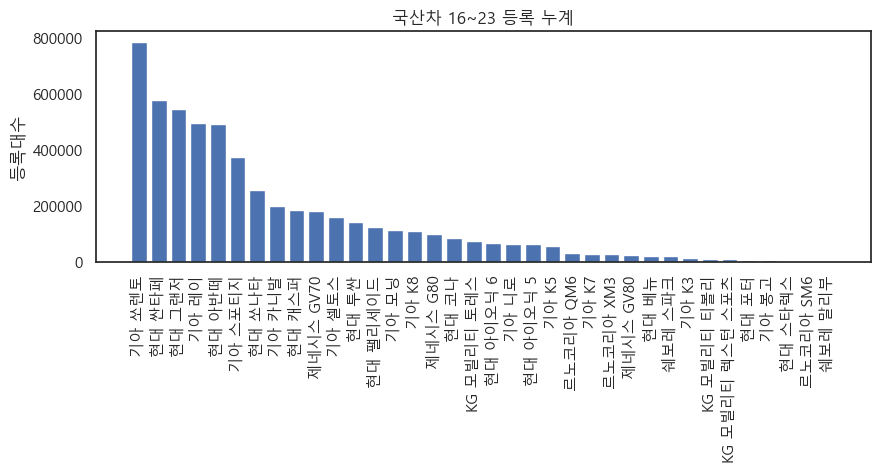

In [189]:
for i in carG.keys():
    print(carG.sum())
fig = plt.figure(figsize=(10, 3))
plt.bar(x=carG.keys(), height=carG.sum().sort_values(ascending=False)) 
plt.xticks(carG.keys(), rotation=90)
plt.title("국산차 16~23 등록 누계")
plt.ylabel("등록대수")

벤츠 E클래스           237235.0
테슬라 모델 Y           24554.0
BMW 3시리즈           60986.0
BMW 5시리즈          164179.0
렉서스 ES             45008.0
BMW X7              1742.0
BMW 6시리즈            4842.0
아우디 A6             54498.0
볼보 XC60             3691.0
벤츠 GLC             36095.0
벤츠 GLE             18312.0
BMW X5              9393.0
BMW iX3              467.0
벤츠 S클래스            53606.0
벤츠 C클래스            42603.0
폭스바겐 티구안           31234.0
테슬라 모델 X             847.0
포르쉐 카이엔             6212.0
BMW X3              8802.0
BMW X4              3933.0
지프 체로키               439.0
벤츠 GLA              4146.0
벤츠 A클래스             6167.0
볼보 S90              2459.0
아우디 Q4 e-트론         1859.0
폭스바겐 ID.4           1252.0
테슬라 모델 3           27183.0
포드 익스플로러           22060.0
벤츠 GLB              4097.0
폴스타 폴스타 2            460.0
벤츠 CLA              1641.0
BMW X6               835.0
미니 미니 해치           13314.0
아우디 A4               592.0
지프 그랜드 체로키           423.0
볼보 XC40             1515.0
폭스바겐 제타             4241.0
폭

Text(0, 0.5, '등록대수')

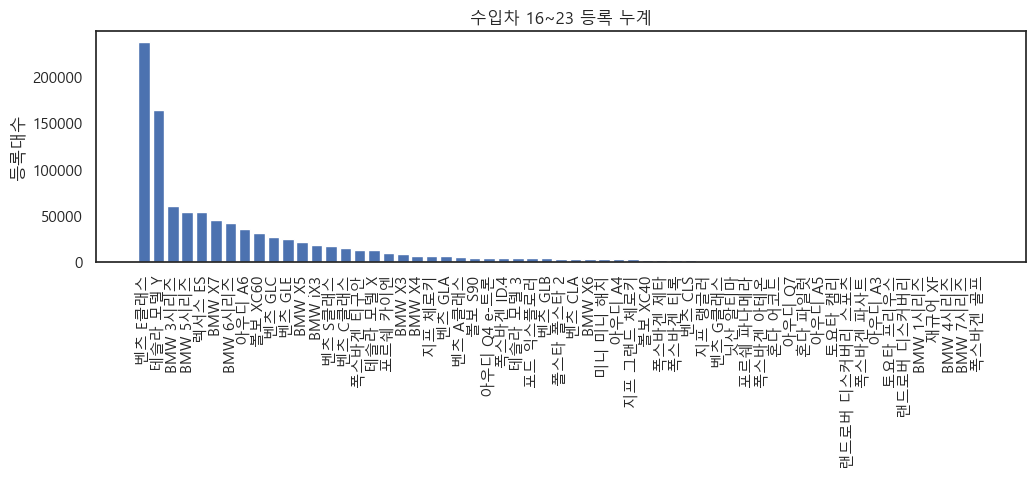

In [185]:
for i in carS.keys():
    print(carS.sum())
fig = plt.figure(figsize=(12, 3))
plt.bar(x=carS.keys(), height=carS.sum().sort_values(ascending=False)) 
plt.xticks(carS.keys(), rotation=90)
plt.title("수입차 16~23 등록 누계")
plt.ylabel("등록대수")